In [1]:
import cv2
import numpy as np
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

config = "--psm 3"

In [2]:


font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#change to your video path
cap = cv2.VideoCapture(0)

cntr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if (ret!=True):
         break

    cntr = cntr +1
    if((cntr%20) ==0):
        
        imgH,imgW,_ = frame.shape
        
        x1,y1,w1,h1 = 0,0,imgH,imgW
        
        text = pytesseract.image_to_string(frame, config=config, lang="eng")
        
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame,(x,imgH-y),(w,imgH-h),(0,0,255),3)
        
        cv2.putText(frame,text,(x1+ int(w1/50),y1 + int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
        
        font = cv2.FONT_HERSHEY_SIMPLEX   
        
        # Our operations on the frame come here
        #gray = cv2.cvtColor(frame)

        # Display the resulting frame
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

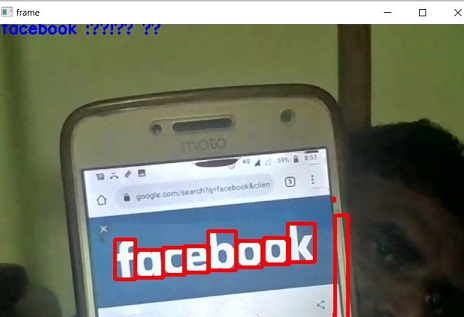